# make Custom dataset

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()

In [28]:
paths =['data/image_basic']

categories = ['amber_test']

imgsize = [64, 64]
use_gray = 0
data_name = 'custom_data'


# rgb2gray function

In [4]:
def rgb2gray(rgb):
    if len(rgb.shape) == 3:
        return np.dot(rgb,[0.299,0.587,0.114])
    else:
        return rgb

# Load images

In [19]:
nclass = len(paths)
valid_exts = ['.jpg', '.gif', '.png', '.tga', '.jpeg']
imgcnt = 0

for i, relpath in zip(range(nclass),paths):
    path = cwd +"/"+relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg = imread(fullpath)
        
        if currimg.shape[2] == 4: # rgby
            currimg = currimg[:,:,0:3]
        
        if use_gray:
            grayimg = rgb2gray(currimg)
        else:
            grayimg = currimg
        
        #Resize
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec = np.reshape(graysmall, (1,-1))
        print(grayvec.shape[1])
        # Save
        curr_label = np.eye(nclass, nclass)[i:i+1,:]
        
        if imgcnt:
            totalimg = np.concatenate((totalimg, grayvec), axis = 0)
            totallabel = np.concatenate((totallabel, curr_label), axis = 0)
        else:
            totalimg = grayvec
            totallabel = curr_label
        imgcnt = imgcnt + 1

12288
12288
12288


c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


# Divide into Training and Test set

In [58]:
randidx = np.random.randint(imgcnt, size = imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]
testidx = randidx[int(4*imgcnt/5):imgcnt]

train_img = totalimg[trainidx]
test_img = totalimg[testidx]

train_label = totallabel[trainidx]
test_label = totallabel[testidx]

data_name="custom_text"

In [59]:
randidx, trainidx

(array([2, 0, 1]), array([2, 0]))

# Save to NPZ

In [60]:
savepath = cwd + "/data/" + data_name +".npz"
np.savez(savepath, trainimg=train_img, trainlabel = train_label, testimg = test_img, testlabel = test_label, use_gray = use_gray, categories=categories)

# Load NPZ

In [61]:
cwd = os.getcwd()
loadpath = cwd + "/data/"+ data_name + ".npz"
loaded = np.load(loadpath)
print(loaded.files)

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'use_gray', 'categories']


In [62]:
load_train_img = loaded['trainimg']
load_test_img = loaded['testimg']
load_train_label = loaded['trainlabel']
load_test_label = loaded['testlabel']
load_categories = loaded['categories']


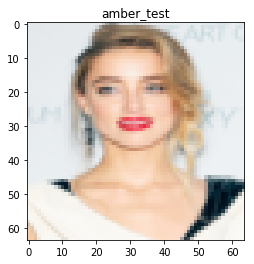

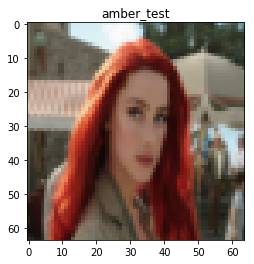

In [63]:
for i in range(load_train_img.shape[0]):
    curlabel_onehot = load_train_label[i]
    curlabel = np.argmax(curlabel_onehot)
    if use_gray:
        curimg = np.reshape(load_train_img[i], (imgsize[0],-1))
        plt.imshow(curimg, cmap="gray")
    else:
        curimg = np.reshape(load_train_img[i], (imgsize[0],imgsize[1],-1))
        plt.imshow(curimg)
    
    plt.title(categories[curlabel])
    plt.show()